In [1]:
import pandas as pd
import numpy as np

## Question 1 - Binary Perceptron

### part a - functions for classification

In [2]:
def classify(w,b,x):
    dot_prod = sum([w[i]*x[i] for i in range(len[x])])
    label = 1 if dot_product + b >= 0 else -1
    return label

In [3]:
def perceptron(data,labels):
    perm = np.random.permutation(len(labels))
    x = data[perm]
    y = labels[perm]
    
    w = np.zeros(x.shape[1])
    b = 0
    
    for i in range(x.shape[0]):
        if y[i] *(np.dot(w,x[i]) + b) <= 0:
            w = w + y[i]*x[i]
            b = b + y[i]
            
    return w,b

### part b - loading and recoding the iris dataset

#### importing iris dataset

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

#### select features 1 &3, recode 0 as -1 and drop all instances of 2

In [5]:
x_subset = np.column_stack((x[:100,1], x[:100,3]))
y_recode = np.where(y == 0, -1, y)
y_recode = y_recode[y_recode != 2]

### part c - running the perceptron and plotting the results

#### running the perceptron

In [6]:
w,b = perceptron(x_subset, y_recode)
w,b

(array([-2.5,  8.1]), 1)

#### plotting the data and decision boundaries

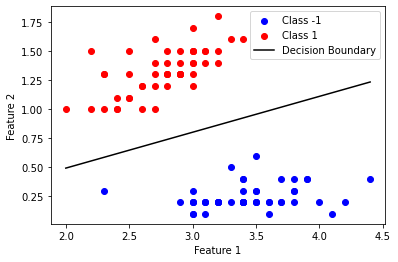

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scatter plot the data points
plt.scatter(x_subset[y_recode==-1,0], x_subset[y_recode==-1,1], color='b', label='Class -1')
plt.scatter(x_subset[y_recode==1,0], x_subset[y_recode==1,1], color='r', label='Class 1')

# Plot the decision boundary
x_axis = np.linspace(np.min(x_subset[:,0]), np.max(x_subset[:,0]), 100)
y_axis = -(b + w[0]*x_axis) / w[1]
plt.plot(x_axis, y_axis, color='k', label='Decision Boundary')

# Set plot labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()

### part d - update counter

In [8]:
def perceptron_updates(data,labels):
    iterations = 20
    updates = []
    
    for n in range(iterations):
        perm = np.random.permutation(len(labels))
        x = data[perm]
        y = labels[perm]

        w = np.zeros(x.shape[1])
        b = 0
        counter = 0
  
        for i in range(x.shape[0]):
            if y[i] *(np.dot(w,x[i]) + b) <= 0:
                w = w + y[i]*x[i]
                b = b + y[i]
                counter += 1

        updates.append(counter)
    
    return updates

In [9]:
updates = perceptron_updates(x_subset, y_recode)
updates

[22, 2, 19, 2, 17, 13, 11, 2, 2, 19, 4, 6, 11, 6, 17, 13, 18, 4, 17, 4]

[Text(0.5, 0, 'count of updates needed for convergence'),
 Text(0.5, 1.0, 'Updates Needed for Covergence by Perceptron Algorithm')]

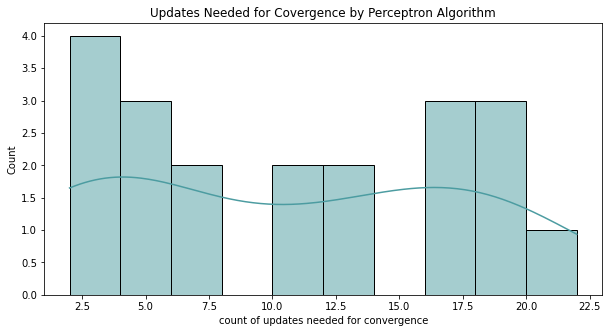

In [10]:
import seaborn as sns
plt.figure(figsize = (10,5))
ax = sns.histplot(updates, color='#4c9ca1', bins=10, kde=True)
ax.set(xlabel="count of updates needed for convergence", title = "Updates Needed for Covergence by Perceptron Algorithm")

## Question 2 - Support Vector Machine

### (a) Is the data linearly separable?

Yes, based on the plot from question 1c the data appears to be linearly separable.

### (b) support vector machine classifier

#### select features 0,2 from the iris data set and labels 1,2

In [11]:
x_sub = np.column_stack((x[50:,0], x[50:,2]))
y_sub = y[y != 0]

#### fit SVM classifier to the data

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_sub, y_sub, test_size = 0.2, random_state = 0)

In [14]:
C_values = [0.1, 0.5, 1, 5, 10, 20, 50, 100, 1000, 100000]
training_errors= []
num_supp_vectors = []

for C in C_values:
    clf = SVC(kernel='linear', C=C)
    clf.fit(x_train, y_train)
    training_error = round((1 - clf.score(x_train, y_train)),4)
    n_supp_vect = sum(clf.n_support_)
    training_errors.append(training_error)
    num_supp_vectors.append(n_supp_vect)

In [15]:
d = {'C':C_values, 'Training Error':training_errors, 'Number of Support Vectors':num_supp_vectors}
df = pd.DataFrame(data=d).set_index('C')
df

,Training Error,Number of Support Vectors
C,,
0.1,0.0625,46
0.5,0.0375,31
1.0,0.0500,24
5.0,0.0500,15
10.0,0.0250,13
20.0,0.0375,10
50.0,0.0375,8
100.0,0.0375,8
1000.0,0.0375,7


### (c) best value of C

In [16]:
y_pred = clf.predict(x_test)
test_error = round((1 - clf.score(x_test, y_test)), 4)

d2 = {'C':C_values, 'Training Error':training_errors, 'Test Error':test_error, 'Number of Support Vectors':num_supp_vectors}
df2 = pd.DataFrame(data=d2).set_index('C')
df2

,Training Error,Test Error,Number of Support Vectors
C,,,
0.1,0.0625,0.1,46
0.5,0.0375,0.1,31
1.0,0.0500,0.1,24
5.0,0.0500,0.1,15
10.0,0.0250,0.1,13
20.0,0.0375,0.1,10
50.0,0.0375,0.1,8
100.0,0.0375,0.1,8
1000.0,0.0375,0.1,7


#### Based on the table above, the value of C that minimizes training error without compromising test error seems to be 10.

In [17]:
clf10 = SVC(kernel='linear', C=10)
clf10.fit(x_train, y_train)

SVC(C=10, kernel='linear')

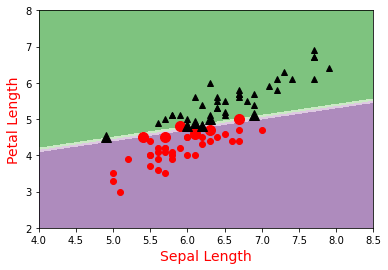

In [26]:
sv = np.zeros(80,dtype=bool)
sv[clf10.support_] = True
notsv = np.logical_not(sv)

delta = 0.005
x_min, x_max = 4, 8.5
y_min, y_max = 2, 8
xx, yy = np.meshgrid(np.arange(x_min, x_max, delta), np.arange(y_min, y_max, delta))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
for i in range(len(Z)):
    Z[i] = min(Z[i],1.0)
    Z[i] = max(Z[i],-1.0)
    if (Z[i] > 0.0) and (Z[i] < 1.0):
        Z[i] = 0.5
    if (Z[i] < 0.0) and (Z[i] > -1.0):
        Z[i] = -0.5
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)

# Plot also the training points
plt.plot(x_train[(y_train==1)*notsv,0], x_train[(y_train==1)*notsv,1], 'ro')
plt.plot(x_train[(y_train==1)*sv,0], x_train[(y_train==1)*sv,1], 'ro', markersize=10)
plt.plot(x_train[(y_train==2)*notsv,0], x_train[(y_train==2)*notsv,1], 'k^')
plt.plot(x_train[(y_train==2)*sv,0], x_train[(y_train==2)*sv,1], 'k^', markersize=10)
plt.xlabel('Sepal Length', fontsize=14, color='red')
plt.ylabel('Petal Length', fontsize=14, color='red')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()